## Binary Logistic Regression
Binary Logistic regression is used in the case where y can only be 0 or 1. Evaluate the impact of the X variables on the decision that variable Y is 0 or 1.
eg: usually used in medicine to diagnose diseases, eg, have heart attack or not?

![](https://i.imgur.com/iifbgcr.jpg)

![](https://i.imgur.com/6p490jd.jpg)

### Remember:
* Logistic Regression is a linear classifier. 
* Recall Linear Regression Remember: Used for binary classification, where the probability needs to be between 0 and 1. This is calculated by the logistic function. 
* Predict YES if f(x) >= 0.5 and NO if f(x)<05

### Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Content
Attribute Information:
* age
* sex (1 = male; 0 = female)
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

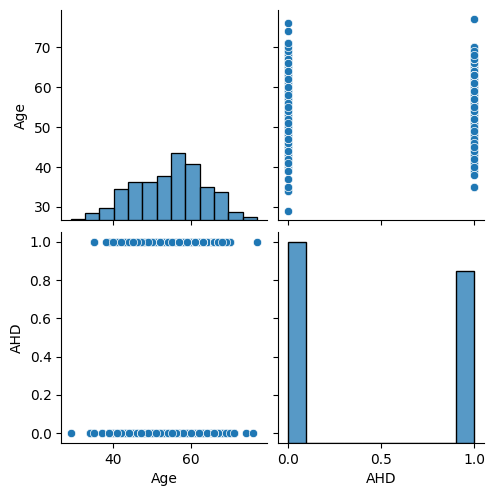

In [59]:
sns.pairplot(df[['Age','AHD']])

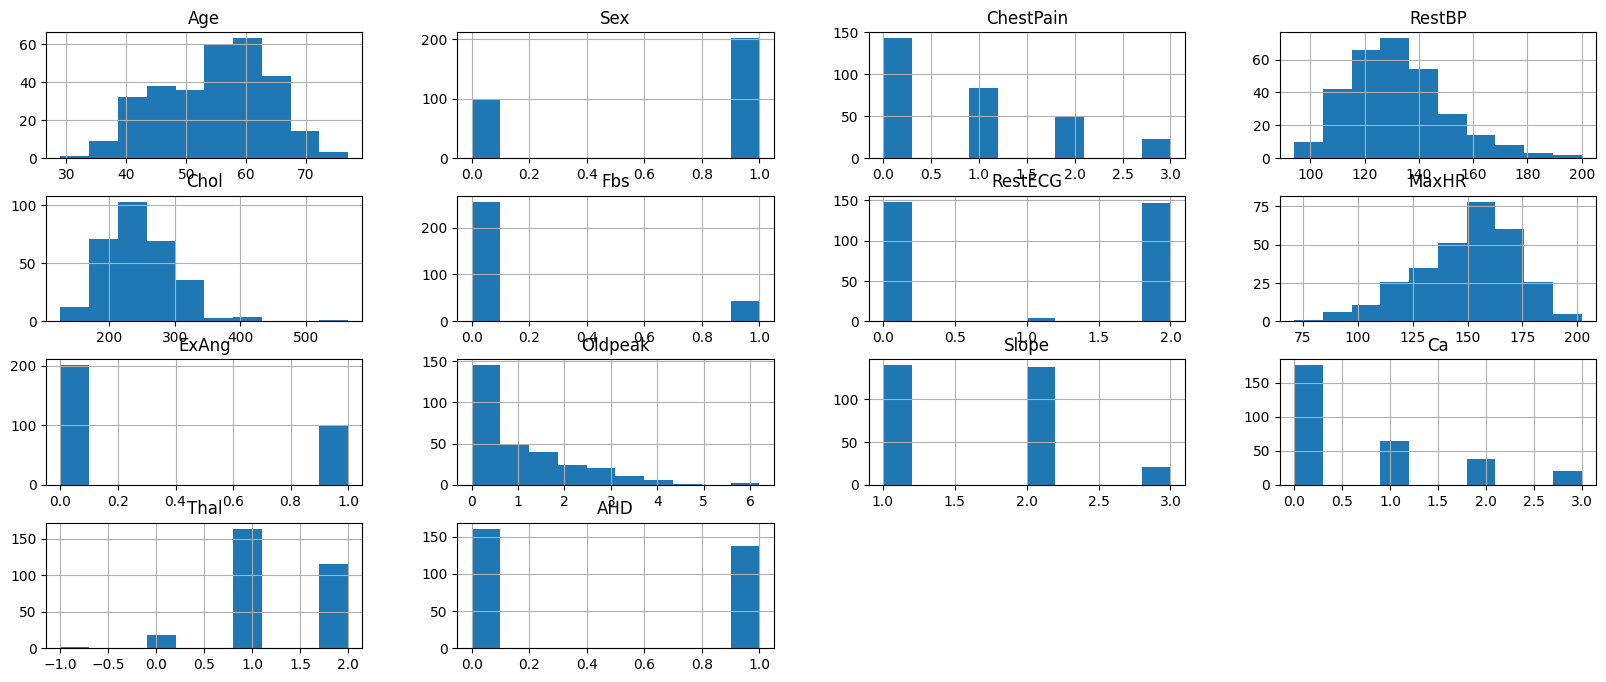

In [55]:
df.hist()
plt.gcf().set_size_inches(20,8)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Heart.csv')
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


AHD: acquired heart disease, mắc bệnh tim 

In [3]:
df = df.drop(columns = 'Unnamed: 0')
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [4]:
# change to numeric category
df['ChestPain'] = df['ChestPain'].astype('category')
df['ChestPain'] = df['ChestPain'].cat.codes
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [5]:
df['Thal'] = df['Thal'].astype('category')
df['Thal'] = df['Thal'].cat.codes

df['AHD'] = df['AHD'].astype('category')
df['AHD'] = df['AHD'].cat.codes
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [6]:
# Check null values
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         0
AHD          0
dtype: int64

In [7]:
# because there are only 4 NaN, we drop rows which include NaN 
df = df.dropna()
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2,1
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1


In [8]:
# split data
X = df.drop(columns = 'AHD')
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2


In [9]:
y = df['AHD']

In [10]:
#Split dateset to train and test set
from sklearn.model_selection import train_test_split 

In [11]:
# 70% go into the training tesst, 20% in the validation test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [12]:
X_test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
61,46,0,1,142,177,0,2,160,1,1.4,3,0.0,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2
55,54,1,0,124,266,0,2,109,1,2.2,2,1.0,2
245,67,1,0,120,237,0,0,71,0,1.0,2,0.0,1
95,52,1,0,128,255,0,0,161,1,0.0,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,41,1,2,135,203,0,0,132,0,0.0,2,0.0,0
117,35,0,0,138,183,0,0,182,0,1.4,1,0.0,1
211,38,1,3,120,231,0,0,182,1,3.8,2,0.0,2
233,74,0,2,120,269,0,2,121,1,0.2,1,1.0,1


In X_test  we have  90 rows for testing now look  look at our training features some of  the data are 50 60 30 40 50 and some of the data are 0 1 2 3, some of the data are 308 200 1266. so some data are really big and some data are really small. 

in this case, this bigger data can be a little  overpowering if all the data in all the training features are going to be in the same range that's going to be good for the training  right because no feature is going to be  overpowering so we are going to use a scalar, we will use a standard scaler from scikit-learn.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
X_test_scaled = scaler.transform(X_test)

z = (x - u)/s
we're not going to do any  fit  for x test it's going to be only transform why is that if when we fit the data  to the scalar  it calculates the mean and standard  deviation of the data to be able to  calculate this z.

when we fit the data  it calculates the mean and standard  deviation and when we do the transform  it uses this mean and standard deviation  and calculates this z we fit the training data so it can use the training data to calculate these parameters the standard deviation mean and then it can use it to transform the data. 

but we  don't want to fit the test data to the scalar because we don't want our model  to know the mean and standard deviation  of test data. we will keep strictly the  test data for evaluation purpose we  don't want our model to know any  information about the test data. 

In [17]:
#let's check how our scale data look
X_train_scaled

array([[ 1.38573367,  0.67185481,  0.21213203, ...,  0.70792084,
        -0.70203785,  1.13274336],
       [ 0.71454401,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339, -0.49996949],
       [-1.07529507, -1.48841682, -0.84347737, ...,  0.70792084,
        -0.70203785, -0.49996949],
       ...,
       [ 1.16200378, -1.48841682,  0.21213203, ..., -1.01249144,
         0.36119339, -0.49996949],
       [ 0.60267907, -1.48841682,  2.32335085, ..., -1.01249144,
        -0.70203785, -0.49996949],
       [ 0.82640895, -1.48841682, -0.84347737, ...,  0.70792084,
        -0.70203785, -0.49996949]])

transformed into the two  dimensional array instead of data frame  format 

In [18]:
X_test_scaled

array([[-0.96343013, -1.48841682,  0.21213203, ...,  2.42833312,
        -0.70203785, -0.49996949],
       [ 0.26708424,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339,  1.13274336],
       [-0.06851059,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339,  1.13274336],
       ...,
       [-1.85834967,  0.67185481,  2.32335085, ...,  0.70792084,
        -0.70203785,  1.13274336],
       [ 2.16878827, -1.48841682,  1.26774144, ..., -1.01249144,
         0.36119339, -0.49996949],
       [ 1.05013884, -1.48841682, -0.84347737, ...,  0.70792084,
         1.42442462, -0.49996949]])

In [76]:
#Using the LogisticRegression module in SciKitlearn
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression()

In [78]:
lr.fit(X_train_scaled, y_train)  #fit the model

LogisticRegression()

In [79]:
lr.predict(X_test_scaled)   

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1], dtype=int8)

In [80]:
lr.score(X_train_scaled, y_train)   #Evaluate the model   

0.8708133971291866

In [81]:
lr.score(X_test_scaled, y_test)     #Score model with validation dataset

0.8666666666666667

The score on the training set is much better than on the validation set, an indication that could be overfitting and not being a general model. (higher train than test is good)

In [82]:
lr.intercept_        #the fitted intercept

array([-0.2064055])

In [83]:
lr.coef_        #the fitted coefficients

array([[ 0.00839934,  0.56104407, -0.73584734,  0.45619015,  0.12657856,
        -0.26566739,  0.23880914, -0.40409063,  0.43023782,  0.43972614,
         0.38445333,  1.06689791,  0.51881191]])

### If we insert one more row 

In [84]:

lr.predict(X_test_scaled[-2:])  #[[-1]]

array([0, 1], dtype=int8)

### If we don't scale the data

In [38]:
lr.fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
lr.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1], dtype=int8)

In [40]:
lr.score(X_train, y_train)   #Evaluate the model   

0.8660287081339713

In [41]:
lr.score(X_test, y_test)    #Score model with validation dataset

0.8666666666666667

In [48]:
lr.coef_        #the fitted coefficients

array([[-2.21676731e-02,  8.78677139e-01, -7.19625355e-01,
         1.92180837e-02,  7.93030789e-04, -3.81649427e-01,
         2.70883038e-01, -3.23563368e-02,  7.22918583e-01,
         4.27758283e-01,  3.71332101e-01,  1.04216824e+00,
         8.27719424e-01]])

In [49]:
lr.intercept_

array([-0.11006577])

Short conclusion: the Score of model with unscaled train dataset is a little bit lower than the score of model with scaled train dataset. However, for the test dataset, the scores of both is the same. We can accept the unscaled. 

### Insert outside values into the model

![](https://i.imgur.com/iifbgcr.jpg)

In [45]:
X_train.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal'],
      dtype='object')

In [85]:
# test insert one more row and print specifically result, we need to use unscaled dataset
#for fast we should insert values and calculate with coeffients in EXCEL
"""
Which means that the formula is: 
P(survive)=1/(1+e^-logit)  

where the logit is: β

logit = β0+β1·x1+β2·x2+...+βn·xn

where β0 is the model intercept and 
the other beta parameters are the model coefficients from above, 
each multiplied for the related feature:

logit = -0.1100-0.0221*Age + 0.8786*Sex - 0.7196*ChestPain+ 0.0192*RestBP + 0.00079*Chol
        - 0.3816*Fbs + 0.2708*RestECG-0.03235*MaxHR + 0.7229*ExAng + 0.4277*Oldpeak
         0.3713*Slope + 1.042*Ca + 0.82771*Thal         
#Predict YES if f(x) >= 0.5 and NO if f(x)<05

"""

'\nWhich means that the formula is: \nP(survive)=1/(1+e^-logit)  \n\nwhere the logit is: β\n\nlogit = β0+β1·x1+β2·x2+...+βn·xn\n\nwhere β0 is the model intercept and \nthe other beta parameters are the model coefficients from above, \neach multiplied for the related feature:\n\nlogit = -0.1100-0.0221*Age + 0.8786*Sex - 0.7196*ChestPain+ 0.0192*RestBP + 0.00079*Chol\n        - 0.3816*Fbs + 0.2708*RestECG-0.03235*MaxHR + 0.7229*ExAng + 0.4277*Oldpeak\n         0.3713*Slope + 1.042*Ca + 0.82771*Thal         \n#Predict YES if f(x) >= 0.5 and NO if f(x)<05\n\n'

In [52]:
"""
Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal'],
      dtype='object')

Predict heart attack probability for person:
Age: 40
Sex: 1
ChestPain: asymptomatic 0
RestBP: 130
Chol: 150
Fbs: 1
RestECG: 2
MaxHR: 130
ExAng: 0
Oldpeak: 2
Slope: 3
Ca: 2
Thal: 1

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
"""
import math
logit = -0.1100-0.0221*40 + 0.8786*1 - 0.7196*0+ 0.0192*130 + 0.00079*150-0.3816*1 + 0.2708*2 -0.03235*130 + 0.7229*0 + 0.4277*2+0.3713*3 + 1.042*2 + 0.82771*1
P_heartattack = 1/(1+math.exp(-logit))
P_heartattack
if P_heartattack>=0.5:
    print('Heartattack: Yes')
else:
    print('Heartattack: No')
print(P_heartattack)


Heartattack: Yes
0.965597239410898


<Axes: >

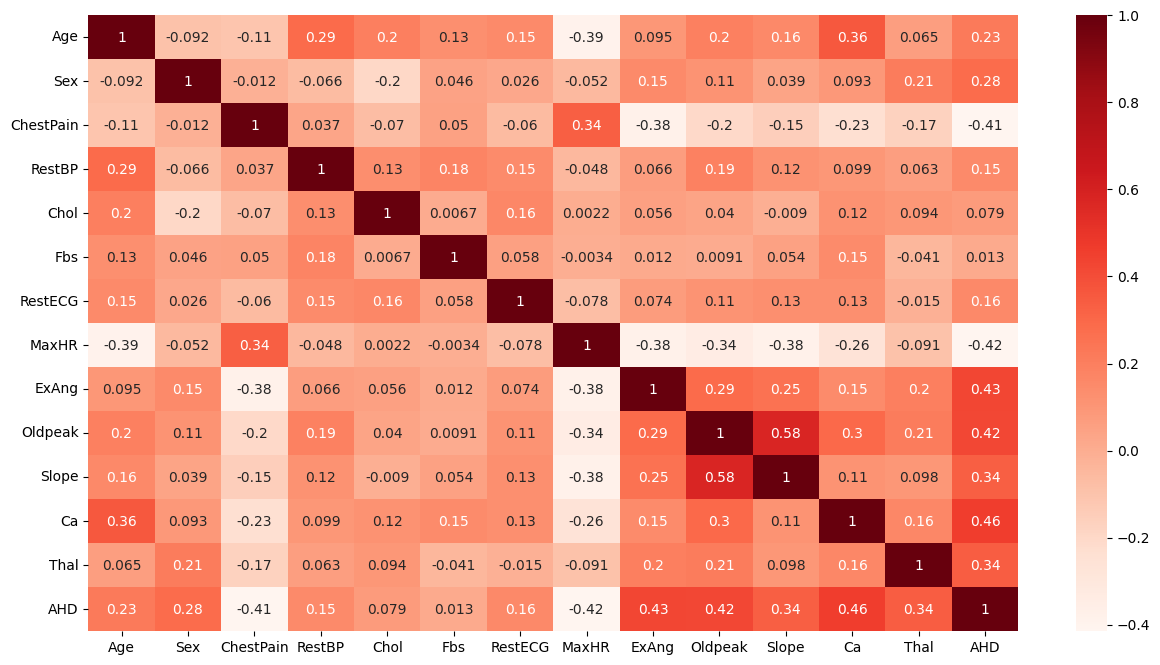

In [53]:
#check correlation between variables
import seaborn as sns 
import matplotlib.pyplot as plt 
#df.corr() 
plt.figure(figsize=(15,8)) 
sns.heatmap(df.corr(), annot =True, cmap=plt.cm.Reds)

In [34]:
#Improve the model
lr1 = LogisticRegression(random_state = 0,
                            C = 0.1,
                            fit_intercept = True,
                            ).fit(X_train_scaled, y_train)

`C = 1` is a regularization parameter  that penalize the extreme values that  should improve the model. (c = 1, 0.1, 0.01)

`fit_intercept = True`: remember the intercept here in the  beginning in linear regression we had `mX + c` and  we said we can ignore the intercept but  we can use it so here is the option  where we can actually use the intercept.

In [35]:
lr1.score(X_train_scaled, y_train)

0.861244019138756

In [36]:
lr1.score(X_test_scaled, y_test)

0.8666666666666667

Even we improve the model, R square is still unchanged.